## Method: SVAR-IV (Structural Vector Autogression with Instrument Variables)

Paper: Monetary Policy Surprises, Credit Costs and Economic Activity

Authors: Mark Gertler, Peter Karadi

Publish: American Economic Journal: Macroeconomics

Data: Supplied by Authors in AEA web.

Code: Repilcation by Jiaqiang Zhuang

Date: 25/02/2018

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy.linalg as la

%matplotlib inline

In [25]:
vardata = pd.read_csv('GK_2015_VAR_data.csv')

fed_fund_rate = vardata['ff']
gov_bond_rate_y1 = vardata['gs1']
gov_bond_rate_y2 = vardata['gs2']
log_ip = vardata['logip']
log_cpi = vardata['logcpi']
excess_bond_premium = vardata['ebp']
date = pd.date_range('19790701', '20120630', freq = 'M') # 设定时间
vardata.head()

,year,month,logcpi,logip,ff,gs1,gs2,cm5yr,cm10yr,cm5f5,ebp,mortg_spread_m,cp3m_spread_m,ff_exp1yr
0,1979,7,429.0459,394.3341,10.47,9.64,9.14,8.897619,8.950000,9.002381,-0.223953,2.14,0.515,NaN
1,1979,8,430.0003,393.6755,10.94,9.98,9.46,9.060435,9.029565,8.998695,-0.317488,2.06,0.785,NaN
2,1979,9,430.9456,393.8156,11.43,10.84,10.06,9.408421,9.334737,9.261053,-0.089456,1.97,1.255,NaN
3,1979,10,432.0151,394.3526,13.77,12.44,11.49,10.627727,10.299091,9.970454,-0.912158,1.34,1.415,NaN
4,1979,11,433.0733,394.2521,13.18,12.39,11.81,10.925263,10.653158,10.381050,-0.166222,2.18,1.665,NaN


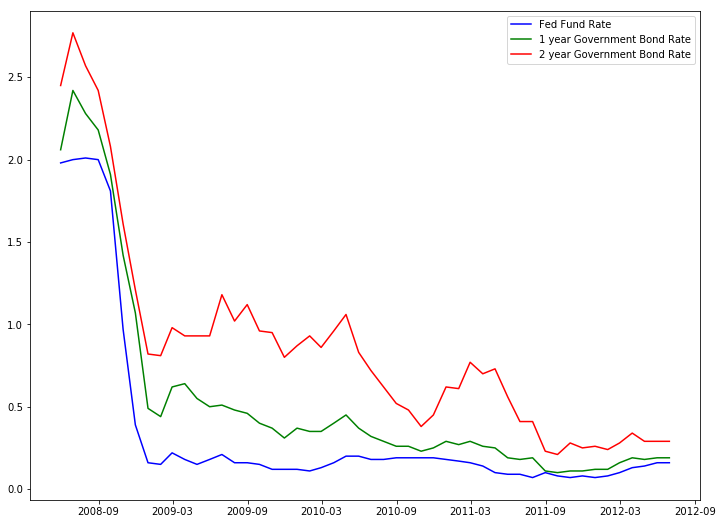

In [21]:
# Page 54, Figure on Fed Fund rate and one year government bond rate
plt.figure(figsize = (12, 9))
plt.plot(date[-50:], fed_fund_rate[-50:], 'b', label = 'Fed Fund Rate')
plt.plot(date[-50:], gov_bond_rate_y1[-50:], 'g', label = '1 year Government Bond Rate')
plt.plot(date[-50:], gov_bond_rate_y2[-50:], 'r', label = '2 year Government Bond Rate')
plt.legend(loc = 'upper right')

# The figure try to show the statements at the last paragraph on page 54, the recent crisis, a period where the 
# short-term interest rate reached the zero lower bound. However, until 2011, Baseline policy indicator, the one 
# year government bond rate remained positive, indicating some degree of central bank leverage over this instrument.

In [56]:
# Part A Policy Indicator and Instrument Choice
# Note: Authors didn't provide the regression result on part A, table 1 and table 2.
factordata = pd.read_csv('GK_2015_factor_data.csv')
ff4_instrument = factordata['ff4_tc']
ff1_instrument = factordata['mp1_tc']
ed2_instrument = factordata['ed2_tc']
ed3_instrument = factordata['ed3_tc']
ed4_instrument = factordata['ed4_tc']
factordata.head(150)

,year,month,mp1_tc,ff4_tc,ed2_tc,ed3_tc,ed4_tc
0,1979,7,NaN,NaN,NaN,NaN,NaN
1,1979,8,NaN,NaN,NaN,NaN,NaN
2,1979,9,NaN,NaN,NaN,NaN,NaN
3,1979,10,NaN,NaN,NaN,NaN,NaN
4,1979,11,NaN,NaN,NaN,NaN,NaN
5,1979,12,NaN,NaN,NaN,NaN,NaN
6,1980,1,NaN,NaN,NaN,NaN,NaN
7,1980,2,NaN,NaN,NaN,NaN,NaN
8,1980,3,NaN,NaN,NaN,NaN,NaN
9,1980,4,NaN,NaN,NaN,NaN,NaN


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
         ...   
366   -0.002420
367    0.000000
368   -0.005161
369   -0.005839
370   -0.009000
371    0.000000
372    0.000000
373    0.000000
374    0.001667
375    0.003333
376    0.004667
377    0.000333
378   -0.000968
379   -0.004032
380    0.000000
381    0.000000
382    0.000000
383   -0.001500
384   -0.003500
385   -0.003710
386    0.005376
387    0.013333
388    0.009667
389    0.000333
390    0.000000
391    0.000000
392    0.000000
393    0.000000
394    0.000000
395    0.003667
Name: ff4_tc, Length: 39

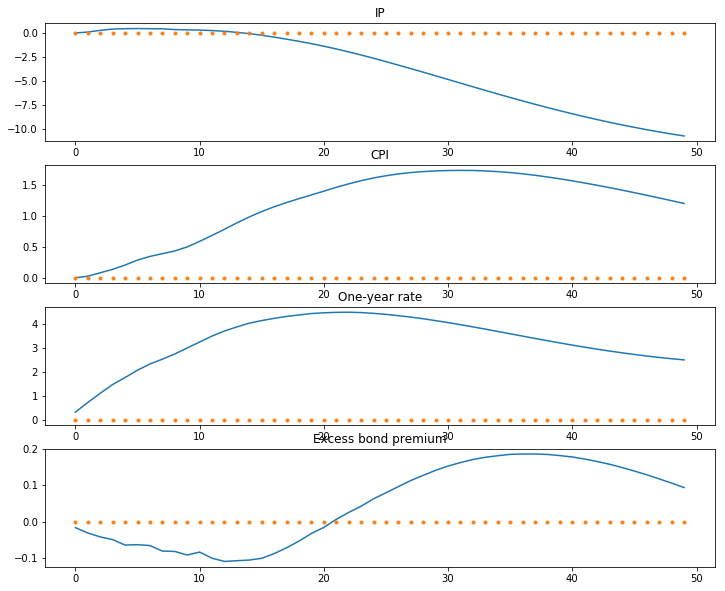

In [93]:
# Simple VAR Part B, Page 60
# Now the variables in simple VAR is logip, logcpi, 1 year government bond rate and excess bond premium
# Simple VAR 的滞后期为12期，月度数据

def VAR1(lags, Y):
    N,T = Y.shape
    X = np.ones((N*lags+1, T-lags))
    for i in range(lags):
        X[N*i+1:N*(i+1)+1,:] = Y[:,lags-1-i:T-1-i]
    beta_ols = la.inv(X @ X.T) @ (X @ Y[:,lags:T].T)
    v_errs = Y[:, lags:T] - beta_ols.T @ X
    return beta_ols, v_errs

def irf_var1(monthes, As):
    '''
    As为估计的简约式VAR中的斜率系数矩阵（其为(P+1)*N*N的形式），
    在第0个分块矩阵，原始估计值为常数项矩阵，替换为恒等矩阵，确保公式看上去
    更直观
    '''
    lags, N, M = As.shape
    As[0,:,:] = np.eye(N)
    fai = np.zeros((monthes, N, N))
    irf = np.zeros((monthes, N, N))
    fai[0,:,:] = np.eye(N)
    irf[0,:,:] = np.eye(N)
    for i in range(1, monthes):
        for j in range(0, lags):
            if i >= j:
                fai[i,:,:] += fai[i-j,:,:] @ As[j,:,:]
    for i in range(1, monthes):
        irf[i,:,:] = irf[i-1,:,:] + fai[i,:,:]
    return irf
    

# get the coefficient value
Y = np.array([log_ip, log_cpi, gov_bond_rate_y1, excess_bond_premium])
lags = 12


beta, v_errs = VAR1(lags, Y)
N, T = np.shape(Y)
# 得到不同滞后期的VAR系数值
A_hat = np.zeros((lags+1,N, N))
A_hat[0] = beta[0,:].T
for i in range(1, lags+1):
    A_hat[i] = beta[N*(i-1)+1:N*i+1,:].T

v_errs_gov_bond_rate_1y = v_errs[2,:] # 得到1年期政府债券率变量在VAR（4）中的残差值
V_hat = (v_errs @ v_errs.T)/(T - N*lags - 1)
# Figure 1 右边，基于Cholesky分解得到的脉冲反应函数
monthes = 50
irf = irf_var1(monthes, A_hat)
S_chol = la.cholesky(V_hat)
irf_sf = irf @ S_chol

x_axis = np.zeros(monthes)
fig, axes = plt.subplots(N,1, figsize = (12, 10))
axes[0].plot(irf_sf[:,0,2])
axes[0].plot(x_axis, '.')
axes[0].set_title('IP')

axes[1].plot(irf_sf[:,1,2])
axes[1].plot(x_axis, '.')
axes[1].set_title('CPI')

axes[2].plot(irf_sf[:,2,2])
axes[2].plot(x_axis,'.')
axes[2].set_title('One-year rate')

axes[3].plot(irf_sf[:,3,2])
axes[3].plot(x_axis, '.')
axes[3].set_title('Excess bond premium')



In [90]:
# Page 59, Table 3,在本数据集中，1991年1月在python中为第138个样本，因此选择从第138开始。
np.set_printoptions(precision=4, suppress = True)
Y = v_errs_gov_bond_rate_1y[138-lags:] # 1年期政府债券利率变量在VAR（4）中的残差值
N_ls = len(Y)
X = np.array((np.ones(N_ls), ed4_instrument[138:]))
beta_ls = la.inv(X @ X.T) @ (X @ Y)
beta_ls[1]
# 现在考虑自己编，然后再用stats中的应用直接给出。
def tabel3(Y, x):
    Obs = len(Y)
    X = np.array((np.ones(Obs), x))
    n,T = X.shape
    beta_ls = la.inv(X @ X.T) @ (X @ Y)
    errors = Y - beta_ls.T @ X
    var_sigma = errors**2/(Obs-n)
    
    return beta_ls
    
print('(page 59), Tabel 3, Effects of High-Frequency Instruments on the First Stage Residuals')
print('                 of the Four Variable VAR (monthly, 1991-2012, lags = 12)')
print('Variables        1 year         1 year         1 year       1 year')
print('FF1            ', tabel3(Y, ff1_instrument[138:]))

(page 59), Tabel 3, Effects of High-Frequency Instruments on the First Stage Residuals
                 of the Four Variable VAR (monthly, 1991-2012, lags = 12)
Variables        1 year         1 year         1 year       1 year
FF1             [ 0.008   0.8905]


In [53]:
ff1_instrument.shape

(396,)